**Введите ваше ФИО**

In [ ]:
Сметанин Георгий Михайлович

# Задание 1

Задача: Создать чат бота для получения информации об исследованиях космоса

Описание: Создайте комплексное приложение командной строки, которое будет использоваться в качестве панели управления исследованиями космоса. Данное приложение будет обращаться к https://api.nasa.gov/ для предоставления пользователям набора информации о космосе, включая:

- Астрономическая картинка дня (APOD): Отображение APOD с пояснениями к нему.
- Фотографии с марсохода: позволяет пользователям выбирать и фильтровать фотографии с марсохода по дате и типу камеры.
- Объекты, сближающиеся с Землей (ОСЗ): Поиск и отображение объектов, сближающихся с Землей, на определенную дату, включая их размеры и потенциальную опасность.
- Данные о космической погоде: Отображают последние данные о космической погоде, включая солнечные вспышки и геомагнитные бури.
Приложение должно позволять пользователям ориентироваться в этих функциях, корректно обрабатывать ошибки и обеспечивать удобство работы.

Требования:
- Пользовательский ввод: Приложение должно предложить пользователю ввести данные, чтобы выбрать, какую функцию он хочет изучить.
- Проверка данных: Убедитесь, что пользовательские данные (например, даты) проверены.
- Обработка ошибок: Корректно обрабатывайте ошибки API и неверные ответы.
- Представление данных: Представляйте данные в четкой и организованной форме.
- Опция выхода: позволяет пользователям выходить из приложения в любое время.

Привет, я бот NASA, вот мой список комманд:
<Фото дня>, <Фото с марсохода>, <Околоземные объекты>, <Погода в космосе>, <Выход>
Выход
До скорых встреч! (Этот текст написал Дмитрий Уткин)


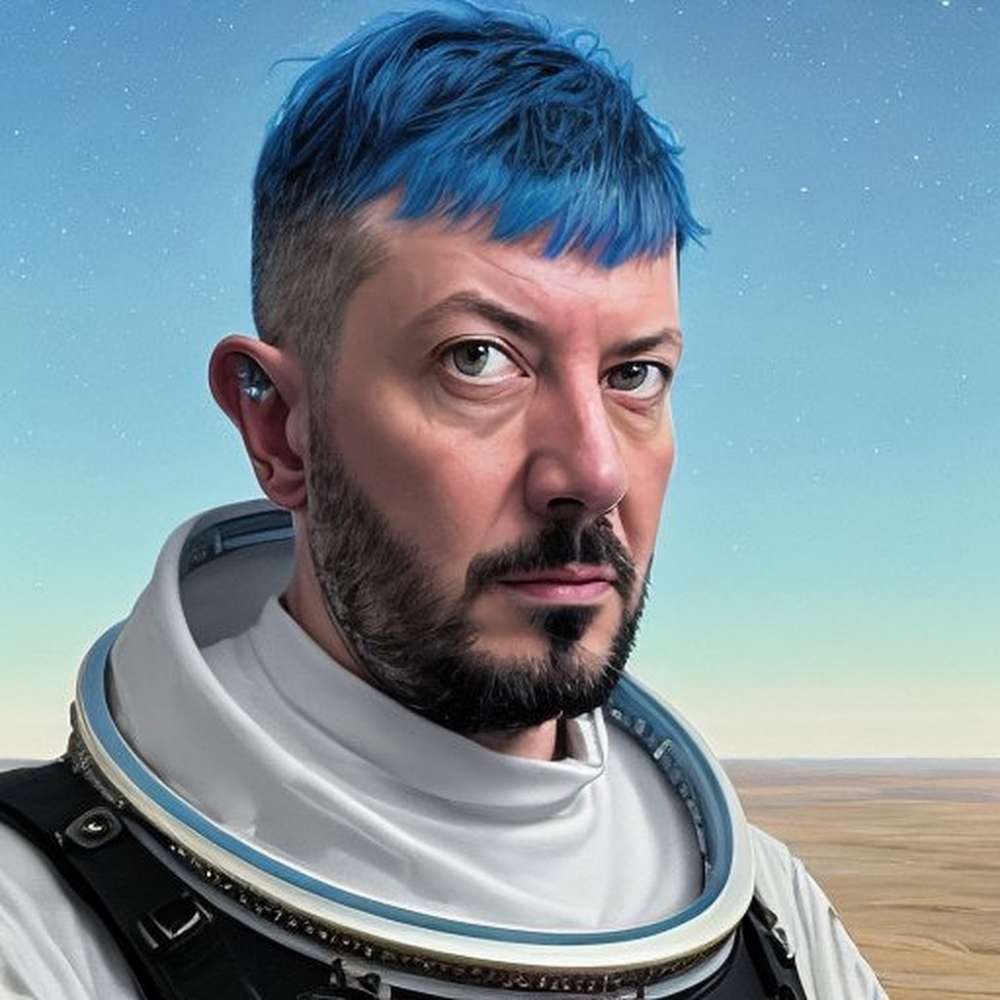

In [ ]:
# !!!!!! Важно !!!!!
# Половина кода в этом коллабе почему-то слетело, слава богу я переносил этот код в пайчарм, но переносил я не финальную версию, а заметил я только это 11.11 в 12 ночи)
# Кнопка погоды не настроена, но она работала!! Войдите в положение, прошу
import requests
from PIL import Image
from IPython.display import display
import io


nasa_url = 'https://api.nasa.gov/'
api_key = 'DEMO_KEY'


def apod():
  url = f'{nasa_url}planetary/apod?api_key={api_key}'
  response = requests.get(url)
  data = response.json()

  print(f"На этом фото - {data['title']}")
  res = requests.get(data['url'])
  img = Image.open(io.BytesIO(res.content))
  display(img)
  print('---------------')


def mars_rover(date, camera):
  url = f'{nasa_url}mars-photos/api/v1/rovers/curiosity/photos?earth_date={date}&camera={camera}&api_key={api_key}'
  response = requests.get(url)
  data = response.json()

  for photo in data['photos']:
    res = requests.get(photo['img_src'])
    img = Image.open(io.BytesIO(res.content))
    display(img)
    print('---------------')


def neos(date):
  url = f'{nasa_url}neo/rest/v1/feed?start_date={date}&end_date={date}&api_key={api_key}'
  response = requests.get(url)
  data = response.json()

  for neo in data['near_earth_objects'][date]:
    print(f"Объект № {neo['name']}")
    print(f"Диаметр: {neo['estimated_diameter']['meters']['estimated_diameter_max']}m")
    print(f"Потенциальная опастность(да<True> или нет<False>): {neo['is_potentially_hazardous_asteroid']}")
    print('---------------')


def space_weather():
  url = f'{nasa_url}DONKI/FLR?api_key={api_key}'
  response = requests.get(url)
  data = response.json()
  for event in data:
    i = 0
    i += 1
    if i == 4:
      break
    else :
      print(f"ID: {event['flrID']}")
      print(f"Class Type: {event['classType']}")
      print(f"Begin Time: {event['beginTime']}")
      print(f"Peak Time: {event['peakTime']}")
      print(f"End Time: {event['endTime']}")
      print('---')


def answers():
  while True:
    print('Привет, я бот NASA, вот мой список комманд:')
    print('<Фото дня>, <Фото с марсохода>, <Околоземные объекты>, <Погода в космосе>, <Выход>')
    query = input()
    if query == 'Фото дня':
      apod()
    elif query == 'Фото с марсохода':
      data = input('Введите дату в формате - (YYYY-MM-DD): ')
      camera = input('Введите название камеры(<FHAZ>, <RHAZ>, <MAST>): ')
      mars_rover(data, camera)
    elif query == 'Околоземные объекты':
      data = input('Введите дату в формате - (YYYY-MM-DD): ')
      neos(data)
    elif query == 'Погода в космосе':
      space_weather()
    elif query == 'Выход':
      print('До скорых встреч! (Этот текст написал Дмитрий Уткин)')
      res = requests.get('https://yuzh-ural.ru/wp-content/uploads/2023/11/Lebedev.jpg')
      img = Image.open(io.BytesIO(res.content))
      display(img)
      break
    else:
      print('такой команды еще нету =(')

answers()

# Задание 2

Описание задачи

Цель этой задачи - создать скрипт на Python, который взаимодействует с API Чикагского института искусств (https://api.artic.edu/docs/) для извлечения и отображения произведений искусства. Скрипт должен позволять пользователям просматривать работы по страницам, фильтровать их по имени художника и просматривать подробную информацию о выбранных произведениях искусства. Ниже приведены требования и функциональные возможности, которые необходимо реализовать:

Требования:
Извлекать произведения искусства:

- Создайте функцию, которая извлекает список произведений искусства из API Чикагского института искусств.
Функция должна принимать параметр page для разбивки на страницы и возвращать список произведений искусства вместе с информацией о разбивке на страницы.
Фильтровать произведения искусства:

- Реализуйте функцию, которая фильтрует список произведений искусства на основе имени указанного художника. Функция должна возвращать список работ, которые соответствуют имени художника (без учета регистра).
Отображать подробную информацию об оформлении:

- Напишите функцию, которая отображает названия работ для пользователя и позволяет ему выбрать одну из них, введя соответствующий номер.
После выбора функция должна отображать подробную информацию о выбранном произведении, включая название, исполнителя, дату и носитель.
Разбивка на страницы и взаимодействие с пользователем:

- Создайте основную функцию, которая управляет выборкой произведений и взаимодействием с пользователем.

Разрешите пользователям перемещаться по страницам с произведениями искусства, выполнять фильтрацию по исполнителю или выходить из программы.

Если страниц с произведениями искусства несколько, укажите варианты перехода к следующей странице, предыдущей странице, фильтрации по исполнителю или выхода из программы.

In [ ]:
import requests

url = ''

# Задание 3

Задача: Создать программу по управлению портфелем криптовалют

Цель: Создать скрипт на Python, который извлекает цены на криптовалюты в режиме реального времени, позволяет пользователям управлять портфелем криптовалют, вычисляет общую стоимость портфеля, отслеживает изменения цен и предоставляет исторические данные о ценах для анализа.

Требования:
Получение текущих цен на криптовалюты:

Используйте https://docs.coingecko.com/ для получения актуальных цен на список криптовалют.

Управление портфелем:

- Позволяет пользователю создавать портфель криптовалют и управлять им, указывая количество каждой криптовалюты, которой он владеет.
- Расчитывает общую стоимость портфеля в указанной фиатной валюте (например, долларах США).

Отслеживание изменения цен:

- Отображение процентного изменения цены для каждой криптовалюты в портфеле за последние 24 часа.
- Выделите все криптовалюты, стоимость которых значительно увеличилась или снизилась.

Поиск исторических данных о ценах:

- Получение исторических данных о ценах на указанную криптовалюту за последнюю неделю.
- Предоставьте пользователю возможность визуализировать эти данные в простом текстовом формате (например, цены за день).

Взаимодействие с пользователем:

- Реализуйте интерфейс командной строки для ввода данных пользователем.
- Предоставьте опции для получения текущих цен, управления портфелем, просмотра изменений цен или анализа исторических данных.


# Задание 4

Задание 4: Проектное

Вам необходимо самостоятельно найти откртое API предоставляющее информацию в открытом доступе и реализовать собственный проект!


Критерии приемки результата:

- Проект включает в себя не менее 5 возможостей для пользователя
- Проект позволяет использовать все возможности проекта пользователю при помощи взаимодействия через коммандную строку
- Проект работает с открытым API (это значит что при проверке вашей работы преподавателем, преподавателю необходимо просто запустить ячейку с кодом вашего проекта и она будет работать без дополнительных манипуляции)
- Проект должен обязательно включать в себя ряд используемых конструкции:
    - Функции
    - Условные конструкции
    - Ввод/вывод
    - Словари/Списки
- Допускается использование библиотек:
    - requests
    - datetime
    - random

**Здесь добавьте описание вашего проекта**

Проект - Поисковик по аниме, пользователь пишет название аниме, а программа выдает информацию по нему


In [3]:
!pip install shikimori_api
import shikimori_api #эта библиотека просто заменяет апи и ключ
import random
import requests
from PIL import Image
from IPython.display import display
import io

def random_anime():

  rand = random.randint(1000, 40000)
  session = shikimori_api.Shikimori()
  api = session.get_api()

  if api.animes(rand).status_code == 200:
    anime = api.animes(rand).GET()

    info = []
    name = anime['russian']
    aired_year = anime['aired_on']
    released_year = anime['released_on']
    russian_genres = [genre['russian'] for genre in anime['genres']]
    if released_year == None:
        released_year = 'онгоинг'
    rating = anime['score']
    if anime['description'] == None:
      print('Нету описания')
    else:
      description = anime['description']

    if name:
        info.append(
              f"{name}({aired_year} - {released_year})\n"
              f"⭐Рейтинг: {rating}\n"
              f"Жанры: {', '.join(russian_genres)}"
              f"📄Описание: {description}\n"
          )
        return "\n".join(info)
    else:
        return None
  else: random_anime()


def get_info_anime(name):

    session = shikimori_api.Shikimori()
    api = session.get_api()
    search_anime = api.animes.GET(search=name, kind='tv')[0]
    anime = api.animes(search_anime['id']).GET()

    info = []
    name = anime['russian']
    aired_year = anime['aired_on']
    released_year = anime['released_on']
    russian_genres = [genre['russian'] for genre in anime['genres']]
    if released_year == None:
        released_year = 'онгоинг'
    rating = anime['score']
    if anime['description'] == None:
      print('Нету описания')
    else:
      description = anime['description']

    if name:
        info.append(
            f"{name}({aired_year} - {released_year})\n"
            f"⭐Рейтинг: {rating}\n"
            f"Жанры: {', '.join(russian_genres)}"
            f"📄Описание: {description}\n"
        )
        return "\n".join(info)
    else:
        return None

def answers():
  while True:
    print('Привет, я бот аниме, вот мой список комманд:')
    print('<Случайное аниме>, <Поиск информации по аниме>, <Выход>')
    query = input()
    if query == 'Случайное аниме':
      random_anime()
    if query == 'Поиск информации по аниме':
      name = input('Введите название аниме(желатеньно на англиском): ')
      print(get_info_anime(name))
    elif query == 'Выход':
      print('До скорых встреч! (Этот текст написал those who know)')
      break
    else:
      print('такой команды еще нету =( попробуйте снова')

answers()

Привет, я бот аниме, вот мой список комманд:
<Случайное аниме>, <Поиск информации по аниме>, <Выход>
Поиск информации по аниме
Введите название аниме(желатеньно на англиском): chainsaw man
Человек-бензопила(2022-10-12 - 2022-12-28)
⭐Рейтинг: 8.47
Жанры: Экшен, Фэнтези, Сёнен📄Описание: У Дэндзи [デンジ] есть мечта — жить мирной и счастливой жизнью, проводя время с любимой девушкой. Однако суровая реальность в лице некоего якудзы заставляет парня вернуться с небес на землю, ведь он вынужден убивать демонов, чтобы расплатиться с необъятными долгами покойного отца. Вместе со своим дьявольским питомцем [character=174750]Почитой[/character], которого использует в качестве оружия, Дэндзи готов сделать что угодно, даже за небольшую плату.

Вскоре парень изжил свою полезность и был убит демоном, заключившим контракт с якудзой. Но верный [character=174750]Почита[/character] спасает своего хозяина, заключив с ним контракт. Почита стал одним целым с умирающим Дэндзи, заменив ему сердце, и подарил ему

RecursionError: maximum recursion depth exceeded in comparison